# Customer Churn 

- Customer churn is defined as the percentage of customers who leave your product or service within a predefined time frame.

ex: 
1. For a Telecom industry, Churn would refer to the customer leaving the telephone service of your company.
2. For Financial Sector, Churn would refer to the customer leaving your financial servies like exiting the bank etc.
3. For OTT domain, Churn would refer to the customer leaving your OTT services.

## Load the standard libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Load the data

In [2]:
data = pd.read_csv('Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Problem Statement
- Context :
1. Predict behaviour to retain customers. You can analyze all relevant customer data and develop focused customer retention programs.

## Exploratory Data Analysis

In [3]:
data.shape

(7043, 21)

## Observation:

- Each row in the data represents one customer data, which implies that there are in total 7043 customer who are enjoying the services provided by my business

In [4]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

## Churn(Target column analysis)

In [5]:
data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [6]:
data['Churn'].value_counts(normalize = True) * 100

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

## Observations:

- 73.5% of customers are sticking with my services which is total 5174 customers.
- 26.5% of customer are not happy with my servies hence they are leaving. This indicates that the churn rate is 26.5%.
- 26.5% churn rate is not good for any business hence necessary business actions are vital.

<Axes: xlabel='Churn', ylabel='count'>

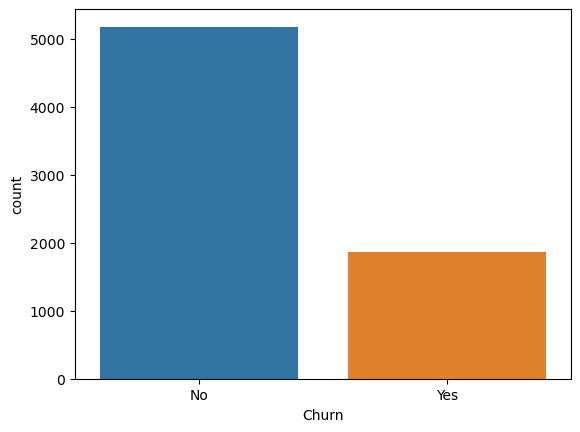

In [7]:
sns.countplot(x = data['Churn'])

## Observations based on the above graph:

- Nearly 1/3th of the customer are existing the business

## Changes the values of Churn to 0 and 1

In [8]:
dic = {'Yes' : 1, 'No' : 0}
data['Churn'] = data['Churn'].replace(dic)
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


## Drop unnecessary columns from the data

In [9]:
data = data.drop('customerID', axis = 1)
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


## Verify Data Type of all cols in the data

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


## Observations:

1. TotalCharges cannot be object hence change the data type of total charges
2. No missing values as well in the data. Even if there are no missing values as info method we are proved wrong. 
3. Data actually contains missing values.

Note : Missing value analysis has to be done very carefully

## Changing data type of Total Charges

In [11]:
data['TotalCharges'] = data['TotalCharges'].astype('float')
data.info()

ValueError: could not convert string to float: ''

In [12]:
data['TotalCharges']

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

In [13]:
data['TotalCharges'] = data['TotalCharges'].str.replace(' ', 'nan')
data['TotalCharges']

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

In [14]:
data['TotalCharges'] = data['TotalCharges'].astype('float')
data['TotalCharges']

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [16]:
data.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [17]:
## Whether to replace the missing values with mean or median?

In [18]:
arr = np.array([2,5, 6, 9, 3, 5])  #75])
arr

array([2, 5, 6, 9, 3, 5])

In [19]:
arr.mean()

5.0

In [20]:
## Mean is impacted by outliers

In [21]:
np.median(arr)

5.0

In [22]:
## median is not impacted by outliers

In [23]:
## To decide between mean imputation and median imputation

In [24]:
data['TotalCharges'].describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

### If the difference between 75% and max value is huge then go for median imputation. 
### if the difference between 75% and max value is less then go for mean imputation

In [25]:
## Since for TotalCharges column the difference between 75% and max is huge prefer median imputation

In [26]:
data['TotalCharges'] = data['TotalCharges'].fillna(data['TotalCharges'].median())
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## Like total charges column there is a possbility that other columns also might contain missing just verify

In [27]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


## Which Contract customer are more likely to Churn?

<Axes: xlabel='Contract', ylabel='count'>

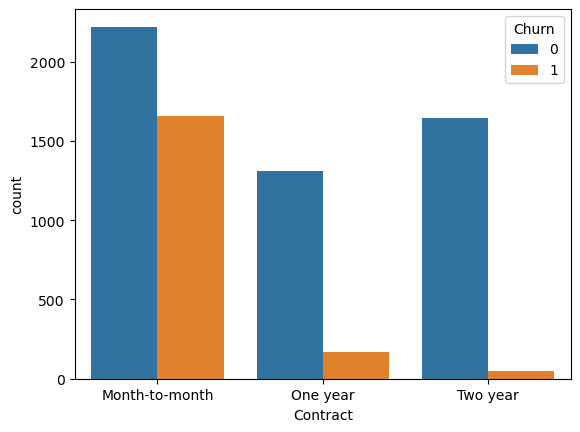

In [28]:
sns.countplot(x = data['Contract'], hue = data['Churn'])

In [29]:
## Whether male customers are more likely to churn or female customers?

<Axes: xlabel='gender', ylabel='count'>

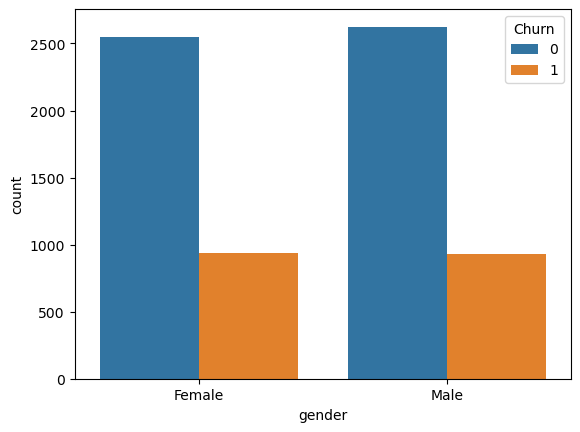

In [30]:
sns.countplot(x = data['gender'], hue = data['Churn'])

In [31]:
## Whether Senior Citizer stay with us for long time

<Axes: xlabel='SeniorCitizen', ylabel='count'>

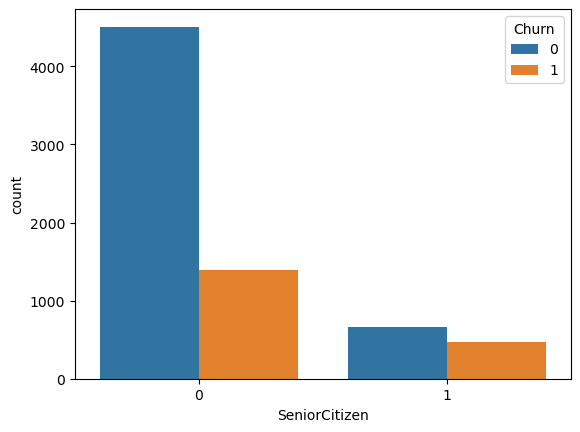

In [32]:
 sns.countplot(x = data['SeniorCitizen'], hue = data['Churn'])

## Continuation of yesterday's data

In [33]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


## Analyzing Monthly Charges and Total Charges column

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

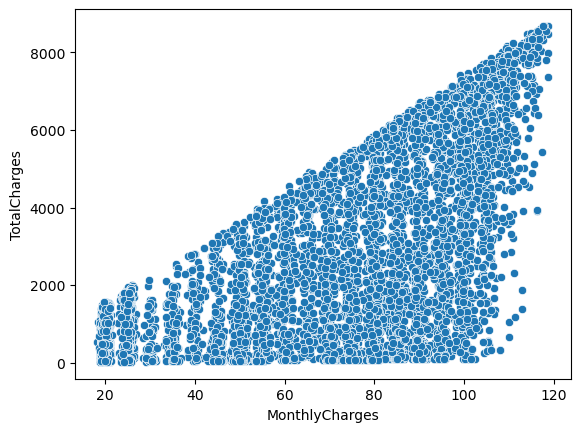

In [34]:
sns.scatterplot(x = data['MonthlyCharges'], y = data['TotalCharges'])

## Observations:

- MonthlyCharges and TotalCharges seem to have linear relation among them.

## Create a heatmap to understand the exact relation between them

<Axes: >

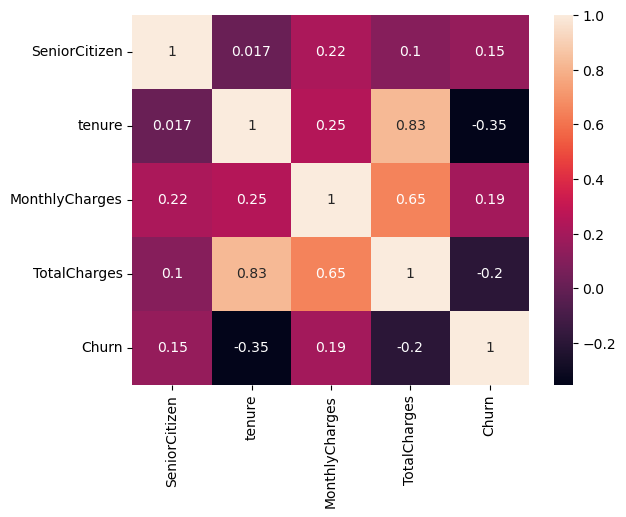

In [35]:
sns.heatmap(data.corr(), annot = True)

## Observations:

- MonthlyCharges and TotalCharges are related to each other. Hence, we can consider only 1 column for our analysis and drop the other column

#### Since, TotalCharges can contain more information compared to Monthly Charges so we can safely drop MonthlyCharges column from the data.

In [36]:
data = data.drop('MonthlyCharges', axis = 1)
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,151.65,1


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


## More Exploratory Data Analysis on object columns

In [38]:
data.describe(include = 'O')

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
freq,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365


## Observations:

1. Although, we have almost equal number of male and female customer but male customer are a bit higher.
2. Month-to-Month contract is favourite among the customers
3. Electronic Check is the favourite payment method.
4. Customers are not going for OnlineSecurity
5. PhoneService is the highest among the customer in comparison to all other services.

<Axes: xlabel='TotalCharges', ylabel='PaymentMethod'>

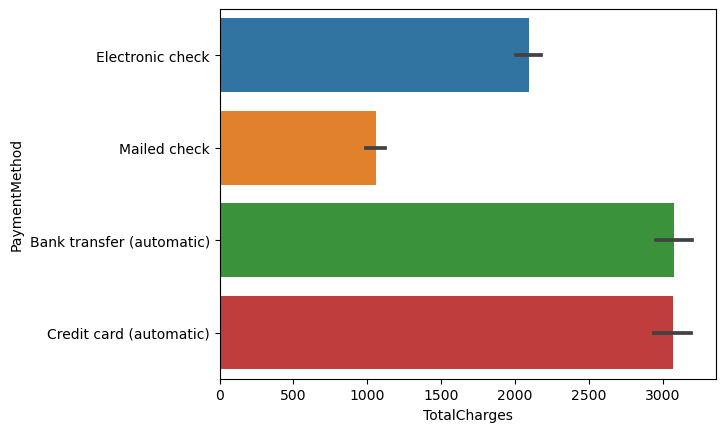

In [39]:
sns.barplot(y = data['PaymentMethod'], x = data['TotalCharges'])

<Axes: xlabel='TotalCharges', ylabel='Contract'>

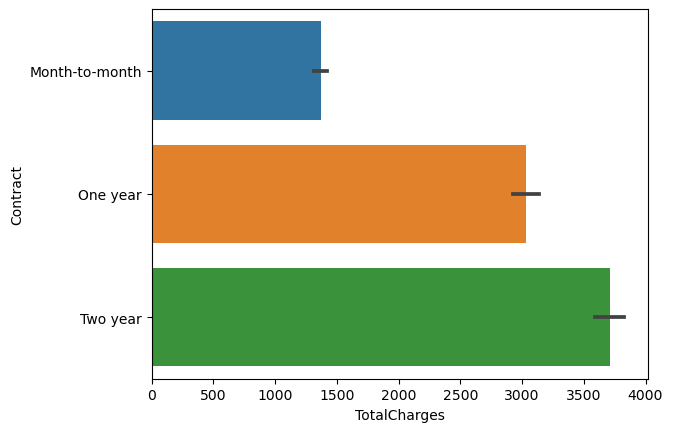

In [40]:
sns.barplot(x = data['TotalCharges'], y = data['Contract'])

## Feature Scaling

In [41]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss

StandardScaler()

In [42]:
data[['tenure', 'TotalCharges']]= ss.fit_transform(data[['tenure', 'TotalCharges']])
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,Female,0,Yes,No,-1.277445,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,-0.994242,0
1,Male,0,No,No,0.066327,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,-0.173244,0
2,Male,0,No,No,-1.236724,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,-0.959674,1
3,Male,0,No,No,0.514251,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),-0.194766,0
4,Female,0,No,No,-1.236724,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,-0.940470,1


## Encoding

In [43]:
data = pd.get_dummies(data, drop_first = True)
data.head()

,SeniorCitizen,tenure,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,-1.277445,-0.994242,0,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
1,0,0.066327,-0.173244,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,-1.236724,-0.959674,1,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0,0.514251,-0.194766,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,0,-1.236724,-0.940470,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0


## Seperate X and y

In [44]:
X = data.drop('Churn', axis = 1)
y = data['Churn']

## Split the data into Train Test split

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

## Fit Logistic Regression on X_train and y_train

In [49]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr

LogisticRegression()

In [50]:
lr.fit(X_train, y_train)

LogisticRegression()

## Perform prediction on X_test

In [52]:
y_pred = lr.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

## Perform Evalution

In [53]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8021769995267393

## Which ML Classification model fits best on this data

- Apply all the algorithms on this data and check the one with best accuracy

In [55]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()

from sklearn.svm import SVC
svc = SVC()

## Applying Decision Tree Algorithm

In [56]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [58]:
y_pred_dtc = dtc.predict(X_test)
y_pred_dtc

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [59]:
accuracy_score(y_test, y_pred_dtc)

0.7444391859914813

## Applying KNN ML Algorithm

In [60]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [61]:
y_pred_knn = knn.predict(X_test)
y_pred_knn

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [62]:
accuracy_score(y_test, y_pred_knn)

0.7657359204921912

## Applying Random Forest ML algorithm

In [63]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [64]:
y_pred_rf = rf.predict(X_test)
y_pred_rf

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [65]:
accuracy_score(y_test, y_pred_rf)

0.783719829626124

## Apply Naive Bayes ML algorithm

In [66]:
bnb.fit(X_train, y_train)

BernoulliNB()

In [67]:
y_pred_bnb = bnb.predict(X_test)
y_pred_bnb

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

In [68]:
accuracy_score(y_test, y_pred_bnb)

0.7288215806909607

## Applying SVC ML algorithm

In [69]:
svc.fit(X_train, y_train)

SVC()

In [70]:
y_pred_svc = svc.predict(X_test)
y_pred_svc

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [71]:
accuracy_score(y_test, y_pred_svc)

0.7979176526265973

## Observations:

- LogisticRegression ML algorithm is best fit for this data with highest accuracy of 80.25%

# Once you figure out the ML model that best fits the data, next apply KFold Cross Validation to figure out which train and test set gives you the highest accuracy

In [72]:
## cross_val_score(ML model, X, y, cv = no of train and test sets)

In [73]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr

LogisticRegression()

In [74]:
from sklearn.model_selection import cross_val_score
cross_val_score(lr, X, y, cv = 10)

array([0.79858156, 0.80992908, 0.80425532, 0.81818182, 0.78125   ,
       0.79829545, 0.8125    , 0.80965909, 0.79971591, 0.80681818])

## Observations:

1. For the 4th set of train and test data, the logistic Regression produces the highest accuracy
2. For remaining 9 set the accuracy is comparitively lower

## Check the accuracy in train set and test set to verify Overfitting and Underfitting issues

In [75]:
lr.fit(X_train, y_train)

LogisticRegression()

In [77]:
## the score function also return the accuracy in the output

lr.score(X_train, y_train)

0.8062880324543611

In [78]:
lr.score(X_test, y_test)

0.8021769995267393

## Observations:

- The accuracies are equal there by indicating no chanes of overfitting or underfitting for the logistic regression model

## Let's say if there are overfitting and underfitting issues then the next step would be to perform Hyperparameter tuining

## Tabulate the accuracies of all ML classification models for comparision

## Assignment : Use Pipeline concept for all the data preprocessing and also create a pipeline for applying multiple ML models

In [79]:
from sklearn.pipeline import make_pipeline

## Outline of any ML project